<a href="https://colab.research.google.com/github/adrijaa291/esc/blob/main/sms_spam_dectection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [152]:
import numpy as np
import pandas as pd

In [153]:
'''import chardet

# Detect the encoding of the file
with open("spam.csv", 'rb') as f:
    result = chardet.detect(f.read())

encoding = result['encoding']
print(f"Detected encoding: {encoding}")

# Now read the CSV file with the detected encoding
df = pd.read_csv("spam.csv", encoding=encoding)'''

'import chardet\n\n# Detect the encoding of the file\nwith open("spam.csv", \'rb\') as f:\n    result = chardet.detect(f.read())\n\nencoding = result[\'encoding\']\nprint(f"Detected encoding: {encoding}")\n\n# Now read the CSV file with the detected encoding\ndf = pd.read_csv("spam.csv", encoding=encoding)'

In [154]:
df = pd.read_csv("spam.csv", encoding = "Windows-1252")

In [155]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1820,ham,I'll probably be by tomorrow (or even later to...,NaN,NaN,NaN
5503,ham,Perhaps * is much easy give your account ident...,NaN,NaN,NaN
5386,ham,I'm at work. Please call,NaN,NaN,NaN
297,ham,Hurt me... Tease me... Make me cry... But in t...,NaN,NaN,NaN
2422,ham,A bloo bloo bloo I'll miss the first bowl,NaN,NaN,NaN


In [156]:
df.shape

(5572, 5)

In [157]:
# 1. Data cleaning
# 2. EDA
# 3. Text preprocessing
# 4. Model building
# 5. Evaluation
# 6. Imporovement
# 7. Website
# 8. Deploy

##DATA CLEANING

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [159]:
columns_to_drop = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']

# Drop columns if they exist in the DataFrame, ignoring non-existent columns
df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [161]:
df.rename(columns={'v1':'target', 'v2': 'text'}, inplace = True)

In [162]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [163]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [164]:
df["target"] = encoder.fit_transform(df['target'])

In [165]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [166]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [167]:
df.duplicated().sum()

403

In [168]:
df = df.drop_duplicates(keep = "first")

In [169]:
df.shape

(5169, 2)

##EDA

In [170]:
df["target"].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

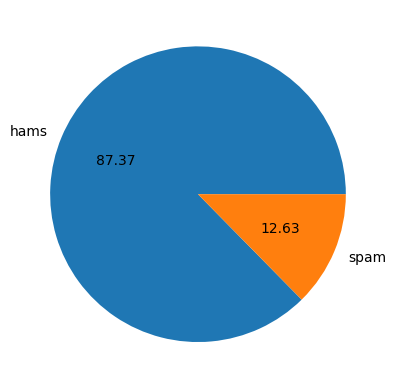

In [171]:
import matplotlib.pyplot as plt
plt.pie(df["target"].value_counts(), labels = ["hams", "spam"], autopct = "%0.2f")
plt.show()

In [172]:
!pip install nltk

In [173]:
import nltk

In [174]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [175]:
df['num_chars'] = df['text'].apply(len)

In [176]:
df.head()

,target,text,num_chars
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [177]:
df['num_words'] = df["text"].apply(lambda x: len(nltk.word_tokenize(x)))

In [178]:
df.head()

,target,text,num_chars,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [179]:
df['num_sentences'] = df["text"].apply(lambda x: len(nltk.sent_tokenize(x)))

In [180]:
df.head()

,target,text,num_chars,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [181]:
df[["num_chars", 'num_words', "num_sentences"]].describe()

,num_chars,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [182]:
#ham
df[df["target"]==0][["num_chars", 'num_words', "num_sentences"]].describe()

,num_chars,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [183]:
#ham
df[df["target"]==1][["num_chars", 'num_words', "num_sentences"]].describe()

,num_chars,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [184]:
import seaborn as sns

<Axes: xlabel='num_chars', ylabel='Count'>

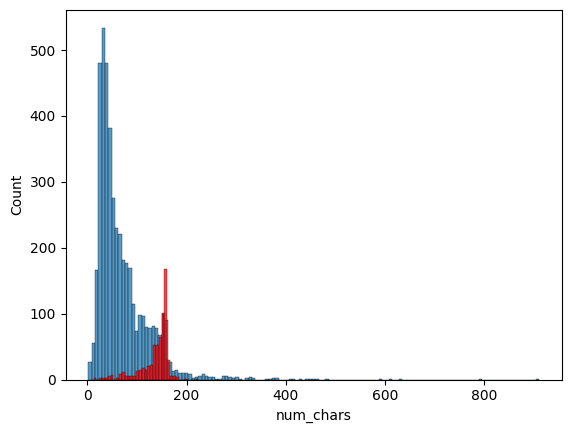

In [185]:
sns.histplot(df[df["target"]==0]["num_chars"])
sns.histplot(df[df["target"]==1]["num_chars"], color = "red")

<Axes: xlabel='num_words', ylabel='Count'>

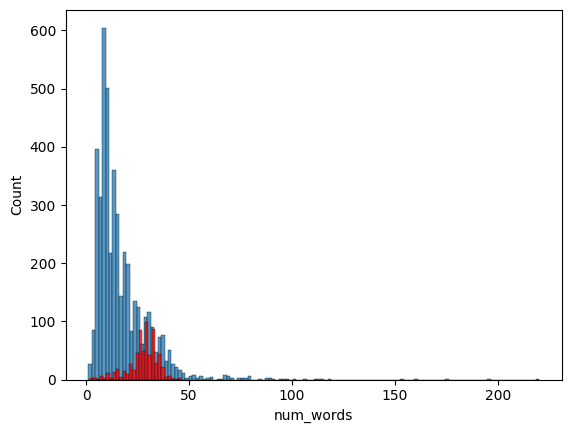

In [186]:
 sns.histplot(df[df["target"]==0]["num_words"])
sns.histplot(df[df["target"]==1]["num_words"], color = "red")

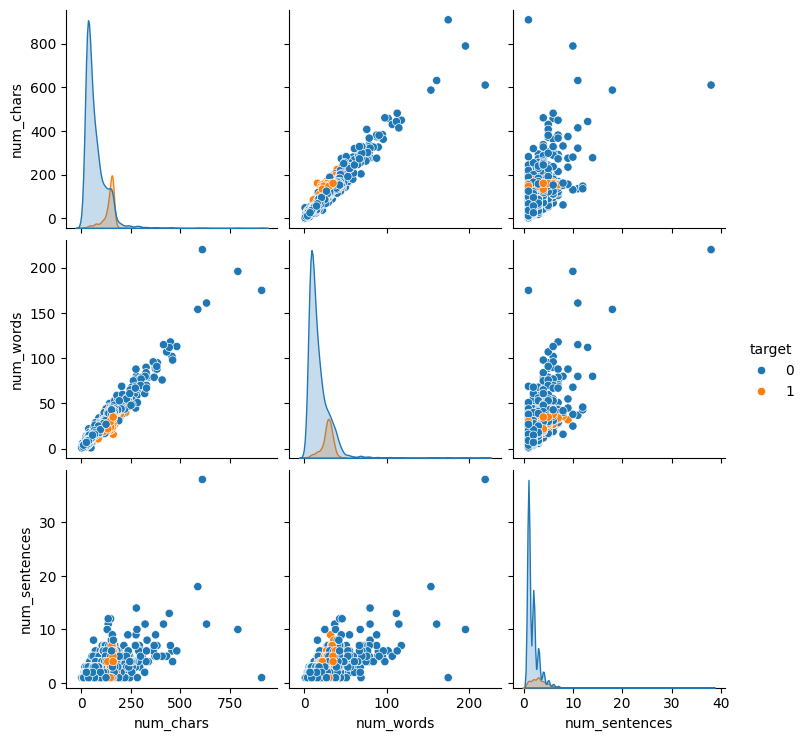

In [187]:
sns.pairplot(df, hue = "target")

In [188]:
#sns.heatmap(df.corr(), annot = True)

##Data Preprocessing

In [189]:
from nltk.corpus import stopwords

# Download the stopwords corpus if not already downloaded
nltk.download('stopwords')

# Get the list of stopwords for English
english_stopwords = stopwords.words('english')

# Display the first 10 stopwords to verify
print(english_stopwords[:10])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [190]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [191]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [192]:
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)
  y = []
  for i in text:
    if i.isalnum():
      y.append(i)
  text = y[:]
  y.clear()
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)
  text = y[:]
  y.clear()
  for i in text:
    y.append(ps.stem(i))
  return y
  #return text

In [193]:
transform_text("Hi hOw, %%")

['hi']

In [194]:
transform_text("Is that seriously how you spell his name")

['serious', 'spell', 'name']

In [195]:
df['text'][20]

'Is that seriously how you spell his name?'

In [196]:
df["transformed_text"] = df["text"].apply(transform_text)

In [197]:
df['transformed_text'] = df['transformed_text'].apply(lambda x: ' '.join(x))

In [198]:
df.head()

,target,text,num_chars,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [199]:
from wordcloud import WordCloud

In [200]:
wk = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = "white")

In [201]:
spam_wk = wk.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep = " "))

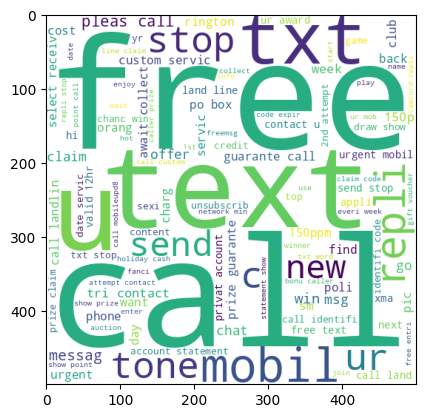

In [202]:
plt.imshow(spam_wk)

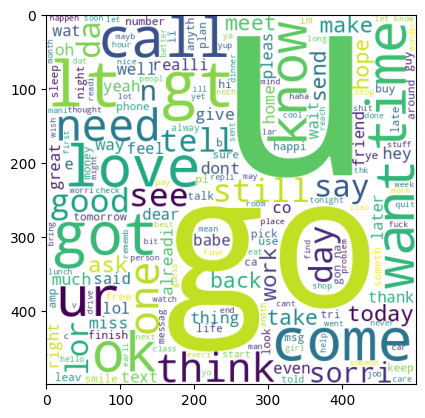

In [203]:
ham_wk = wk.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep = " "))
plt.imshow(ham_wk)

In [204]:
spam_corpus = []
for msg in df[df["target"] == 1]["transformed_text"].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [205]:
len(spam_corpus)

9939

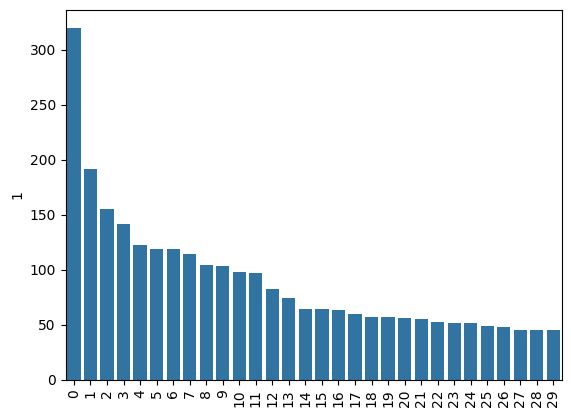

In [206]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation = "vertical")
plt.show()

##Model Building

In [207]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()

In [208]:
X = cv.fit_transform(df["transformed_text"]).toarray()

In [209]:
X.shape

(5169, 6708)

In [210]:
y = df["target"].values

In [211]:
from sklearn.model_selection import train_test_split

In [212]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [213]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [214]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [215]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [216]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [217]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [218]:
tfidf = TfidfVectorizer()

In [219]:
X = tfidf.fit_transform(df["transformed_text"]).toarray()

In [220]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [221]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [222]:
gnbt = GaussianNB()
mnbt = MultinomialNB()
bnbt = BernoulliNB()

In [223]:
gnbt.fit(X_train, y_train)
y_pred1 = gnbt.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [224]:
mnbt.fit(X_train, y_train)
y_pred2 = mnbt.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [225]:
bnbt.fit(X_train, y_train)
y_pred3 = bnbt.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


##Improve Model

In [227]:
import pickle
pickle.dump(tfidf, open('vectorizer3.pkl', 'wb'))
pickle.dump(mnbt, open('model3.pkl', 'wb'))